In [1]:
from PIL import Image, ImageDraw, ImageFont # PIL is Python Imaging Library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import HTML,display,clear_output
import urllib.request

In [2]:
from IPython.core.display import HTML
HTML(urllib.request.urlopen('http://metrprof.xyz/metr4323.css').read().decode())
#HTML( open('metr4323.css').read() ) #or use this, if you have downloaded metr4233.css to your computer

# Pretty fractal pictures using Julia Sets

v 1.3 ,  27 January 2018, by Brian Fiedler

Computers are good for repetitive calculations. Let $z$ be the familiar symbol for a complex number, denoting $z \equiv x + iy$.  Likewise, we choose a complex number constant $c = c_r + ic_i$. As an example of a repetitive calculation, you might not find something much simpler than this:

 $$ z_{n+1} = z_n^2 + c $$

To compute this iteration without any use of complex numbers we can also do:

 $$ x_{n+1} = x_n^2 - y_n^2+ c_r $$
 $$ y_{n+1} = 2 x_n y_n + c_i $$
 
Mathematicians may prefer the complex equation, perhaps to help analyze properties of the iteration, such as deriving theorems.  In a giant weather prediction code, you  probably won't find one instance of a complex number.  Nevertheless, in this notebook we demonstrate computing both ways, with and without complex numbers. 

 * See at least the opening paragraph of [Understanding Julia and Mandelbrot Sets](http://www.karlsims.com/julia.html)
 * This might also be helpful [The Mandelbrot set and Julia sets](http://www.alunw.freeuk.com/mandelbrotroom.html)
 
**Most importantly, for those of you doing this for a grade, see: [Student Tasks](#Student-Tasks) below.**

In the function `julia` we compute trajectories in the $(x,y)$ plane, given initial values of $x$ and $y$ and specified constants $c_r$ and $c_i$.  We define a breakout radius `b` and stop the iteration if the $(x,y)$ has strayed outside a breakout radius that we choose.  

Let me point out a capability of Python:

`x , y = x*x - y*y + cr , 2*x*y + ci`

The above line alleviates the dilemma in attempting this:

`x = x*x - y*y + cr
y = 2*x*y + ci`

In the above two lines, `x` is updated, becoming $x_{n+1}$, but it is $x_n$ that is required in the computation of `y`.  So it would be incorrect.

In [3]:
def julia(x,y,cr,ci,itermax,b):
    xa = [x] # initialize list to store trajectory
    ya = [y] # ditto
    n = 0
    while n<itermax:
        x , y = x*x - y*y + cr , 2*x*y + ci
        xa.append(x)
        ya.append(y)
        n += 1
        breakout = x*x + y*y > b*b
        if breakout: # do not compute beyond the breakout
            return xa,ya,breakout
    return xa,ya,breakout    

In [4]:
# Two example trajectories. Note different initial values of x.
xA , yA , brA = julia(0.5, 0.1 , -0.7492, 0.1, 100, 2)
xB , yB , brB = julia(1.0, 0.1 , -0.7492, 0.1, 100, 2)

In [5]:
# Did the trajectory break out?
brA,brB

(False, True)

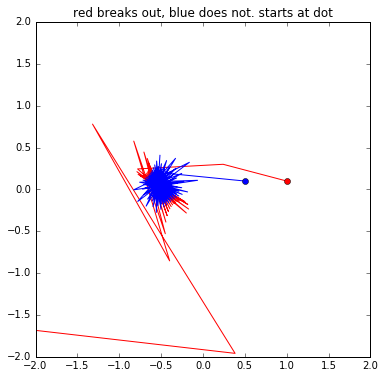

In [6]:
# Plot trajectories:
quick, simple = plt.subplots(figsize=(6,6))
simple.plot(xB,yB,'r') # red
simple.plot(xB[0],yB[0],'ro') # starting point
simple.plot(xA,yA,'b') # blue
simple.plot(xA[0],yA[0],'bo') # starting point
simple.set_xlim(-2,2)
simple.set_ylim(-2,2)
simple.set_title('red breaks out, blue does not. starts at dot');

## Julia sets: study breakout events 

For a dense array of  points in the $(x,y)$ plane, we ask for every point:
 * Does the iteration break out of a specified radius within a specified number of iterations?
 * If it does break out, what were the relative values of $x$ and $y$ just prior to breakout?
 * If it did not break out, how close was the iteration to the specified break out radius?

In [7]:
# width and height of image in pixels
w = 1200
h = 800

In [8]:
ncase = 2 # choose a case 0 through 5


In [9]:
if ncase == 0:
    xrange = 10 # yrange will be calculated consistent with w and h
    itermax = 100 # stop after this number of iterations
    b = 8. # the breakout radius
    cr= -.75 # real part of c
    ci= .0 # imaginary part of c
    x0 = 0 # x at center of image
    y0 = 0 # y at center of image
elif ncase == 1:
    xrange = 5
    itermax=100
    b = 8.
    cr=-.7492
    ci=.1
    x0 = 0
    y0 = 0
elif ncase == 2:
    xrange = .4
    itermax=100
    b = 8.
    cr=-.7492
    ci=.1
    x0 = .09950
    y0 = -.00062
elif ncase == 3:
    xrange = .2
    itermax=100
    b = 8.
    cr=-.7492
    ci=.1
    x0 = .09950
    y0 = -.00062
elif ncase == 4:
    xrange = .1
    itermax=100
    b = 8.
    cr=-.7492
    ci=.1
    x0 = .09950
    y0 = -.00062
elif ncase == 5:
    xrange = .05
    itermax=100
    b = 8.
    cr=-.7492
    ci=.1
    x0 = .09950
    y0 = -.00062
    
bb = b*b
yrange = xrange*h/w
formula = "  z**2 +c  "  # for the annotation

In [10]:
# make the grid of initial points of x and y
xa = np.linspace(-.5*xrange ,  .5*xrange, w) + x0
ya = np.linspace( .5*yrange , -.5*yrange, h) + y0
xi , yi = np.meshgrid(xa,ya) # meshgrid produces a two-dimensional grid, centered at (x0,y0)

### using numpy arrays

We iterate all the points $(x,y)$ forward together.  But note the inefficiency.  Even after a point has broken out, the iteration is still computed, but the update is abandoned.  For example, if breakout occurs at `n=20`, the next 80 iterations are superfluous.  A [masked array]( http://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#what-is-a-masked-array) possibly could be used to prevent computation within the masked part of the array.  But
when we do weather simulation in this course, we do not need masked arrays.  So we will not explore any efficiency gained by using masked arrays here.  Note that `%%timeit` is commented out. Uncommenting it allows the CPU time cell to be given to you.  See [Making Your Jupyter Notebook Magical](http://candidcypher.com/python/making-your-jupyter-notebook-magical/). See my [Appendix](#some-numpy-syntax) for a short demo of some of the array syntax that I use.

In [11]:
use_z = True # to z or not to z ...

In [12]:
#%%timeit
if not use_z:
    n=0
#    itermax=100 # not needed here anymore
    x = xi.copy() # initialize x 
    y = yi.copy() # initialize y 
    while n < itermax:
        xu = x*x - y*y + cr # calculate updated value of x
        yu = 2*x*y + ci # calculate updated value of y
        r2 = xu*xu + yu*yu # distance when updated
        br = r2 > bb # True if iteration is broken out of boundary
        x = np.where( br, x, xu) # but update x only if no break out
        y = np.where( br, y, yu) # but update y only if no break out
        n += 1
        clear_output(wait=True)
        print( "n=",n,  "breakouts =", br.mean() )

In [13]:
#%%timeit
if use_z:
    n=0
#    itermax=100 # not needed here anymore
    x = xi.copy() # initialize x 
    y = yi.copy() # initialize y 
    z = x + y*1j # j is Python's sqrt(-1)
    c = cr + ci*1j
    while n < itermax:
        zu = z*z + c
        r2 = zu.real**2 + zu.imag**2 # distance squared when updated
        br = r2 > bb # True if iteration is broken out of boundary
        z = np.where( br, z, zu) # but update z only if no break out
        n += 1
        clear_output(wait=True)
        print( "n=",n,  "breakouts =", br.mean() )
    x = z.real
    y = z.imag

n= 100 breakouts = 0.809259375


In [14]:
# note that x and y are either the values at the last iteration OR
# the values of x and y just prior to breakout

emphasize_breakout = True # for colorizing the images

if emphasize_breakout:
    red   = np.where( br, 255.*(b+x)/(2*b), 0.) # if break out, red proportional to x
    green = np.where( br, 0., 255.*r2/bb )  # if not break out , add green if close to break out
    blue  = np.where( br, 255.*(b+y)/(2*b), 0.) # if break out, blue proportional to y
else:
    red   = np.where( br, 0., 255.*(x>=y) ) # if not break out, red if x>= y
    green = np.where( br, 0., 255.*(r2<.001*bb) )  # if not break out , green if r2 very small
    blue  = np.where( br, 0., 255.*(y>x) ) # if not break out, blue if y>x
    
rgb = np.zeros( (h,w,3) , dtype=np.uint8 ) # initialize empty array of unsigned 8-bit integers

rgb[:,:,0] = red.astype('uint8')
rgb[:,:,1] = green.astype('uint8')
rgb[:,:,2] = blue.astype('uint8')

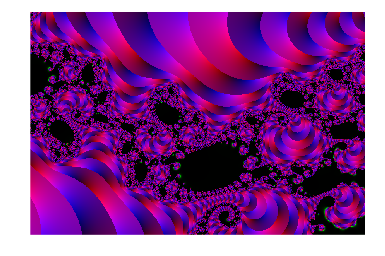

In [15]:
# Easy to plot arrays with imshow, but not my favorite way. Not easy to see original size.
plt.axis('off')
plt.imshow(rgb,interpolation="none");

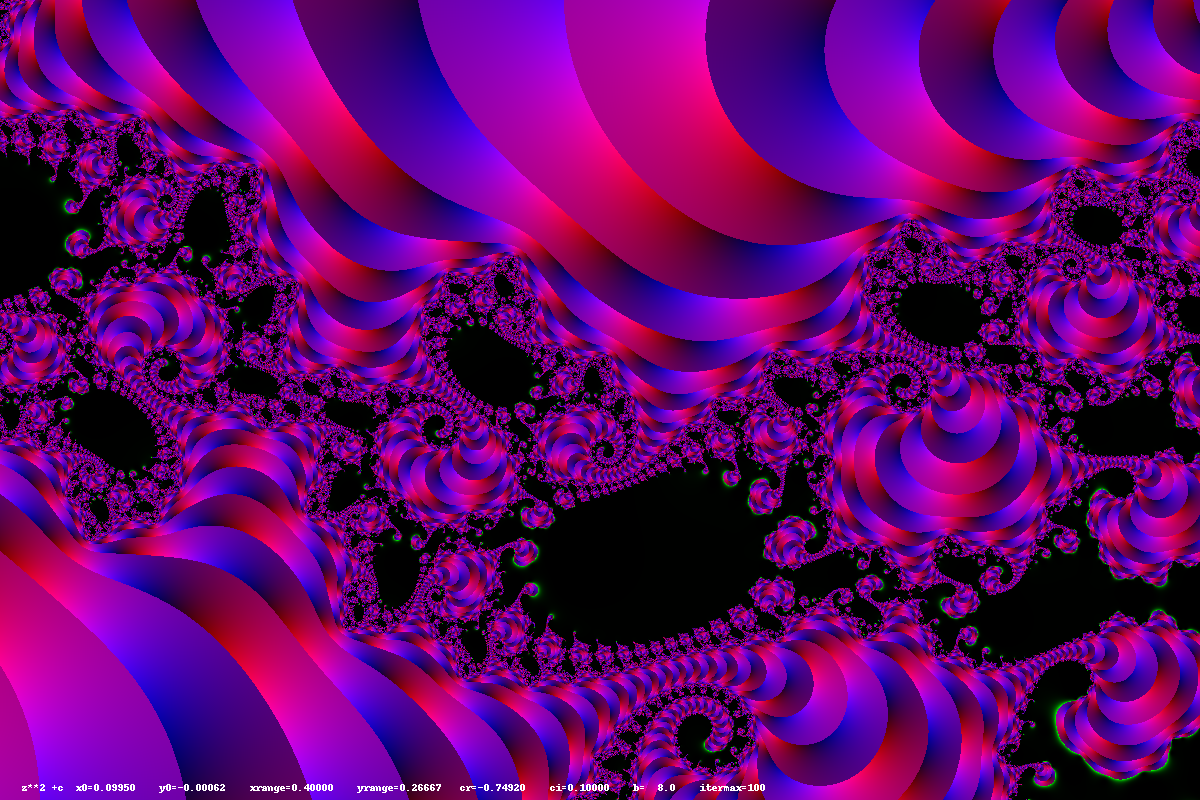

In [16]:
# A better way.  This will display pixels directly, without "zooming"
rgbstring=rgb.tobytes()
fractal_image = Image.frombytes("RGB",(w,h),rgbstring)

# now annotate the image:
draw  =  ImageDraw.Draw ( fractal_image )
#myfont =  ImageFont.truetype ( 'arial.ttf', 16 ) # use Arial.ttf in OSX, arial.ttf in Windows
myfont =  ImageFont.load_default()
info = "x0=%7.5f    y0=%7.5f    xrange=%7.5f    yrange=%7.5f   cr=%7.5f    ci=%7.5f    b=%5.1f    itermax=%d"\
         % (x0,y0,xrange,yrange,cr,ci,b,itermax)
draw.text ( (10,h-18), formula+info, font=myfont, fill="white" )
#draw.line((100,200, 150, 300), fill="white", width=3) # not used

fractal_image # display image

In [17]:
pngname = "fractal_image%d.png" % ncase
print("save to:", pngname)
fractal_image.save(pngname) # save image as PNG file

save to: fractal_image2.png


<hr>
## Student Tasks

See the wikipedia article [Julia Sets](https://en.wikipedia.org/wiki/Julia_set), in particular the pretty pictures in 
*Quadratic Polynomials* and *Examples of Julia Sets*.  Details are not provided for the values of `b`,  `itermax`, `xrange` and `yrange` that were used to make the pretty pictures.  But you may find that the values for `ncase=0` can produce similar pictures.  

Try to reproduce at least one image in each of *Quadratic Polynomials* and *Examples of Julia Sets*.

Then do something creative, so that you will have at least 3 images to show in class.

BTW, now that you have made pretty fractal pictures, you may appreciate the video [Clouds are not Spheres](https://amzn.com/B004R111YW). 

## Appendix

In case you are wondering about the effectiveness of Python numpy arrays, you can try this. It comes to you as "raw" text.  Change in to python by highlighting and typing "y".

### slow, without numpy

### some numpy syntax

In [18]:
play = np.arange(10)
print(play)
thetest = play>7
print(thetest)
newplay = np.where(thetest,999,play)
print(newplay)

[0 1 2 3 4 5 6 7 8 9]
[False False False False False False False False  True  True]
[  0   1   2   3   4   5   6   7 999 999]
